Proximal Intestinal Mucosal Ablation

## Diabetes Disease Prediction System - Supervised Learning 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

## Handle Missing / Zero Values

In [9]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]
print("EDA and Data Preprocessing Completed")

data["Sex"] = 0  #default female
cols = ["Glucose", "BloodPressure", "Insulin", "BMI"]
for col in cols:
    data[col] = data[col].replace(0, data[col].mean())

EDA and Data Preprocessing Completed


In [10]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Sex
0,6,148.0,72.0,35,79.799479,33.6,0.627,50,1,0
1,1,85.0,66.0,29,79.799479,26.6,0.351,31,0,0
2,8,183.0,64.0,0,79.799479,23.3,0.672,32,1,0
3,1,89.0,66.0,23,94.000000,28.1,0.167,21,0,0
4,0,137.0,40.0,35,168.000000,43.1,2.288,33,1,0


## EDA Plot (Percentage)

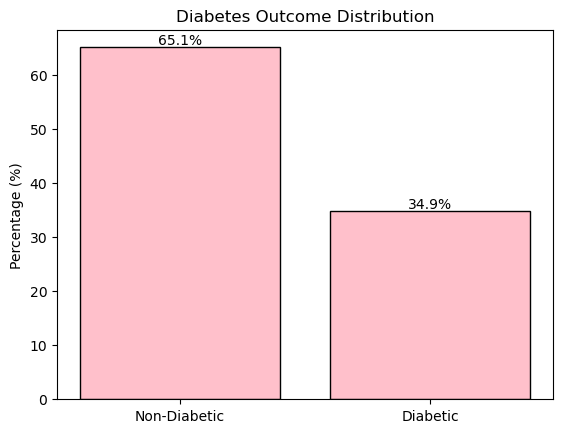

In [11]:
percent = y.value_counts(normalize=True) * 100

plt.bar(['Non-Diabetic', 'Diabetic'],percent,color ='pink',edgecolor='black')
plt.ylabel("Percentage (%)")
plt.title("Diabetes Outcome Distribution")
plt.text(0, percent[0]+0.5, f"{percent[0]:.1f}%", ha="center")
plt.text(1, percent[1]+0.5, f"{percent[1]:.1f}%", ha="center")
plt.show()

## Selecting Required 

In [12]:
X = data[["Pregnancies", "Glucose", "BloodPressure", "Insulin", "BMI", "Age", "Sex"]]
y = data["Outcome"]

## Model Selection

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

models = {"Logistic Regression": LogisticRegression(max_iter=100),
          "KNN": KNeighborsClassifier(n_neighbors=11),
          "Decision Tree": DecisionTreeClassifier(max_depth=11,random_state=42),
          "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)}

accuracy_before = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy_before[name] = accuracy_score(y_test, preds)

print("\nMODEL ACCURACY (BEFORE TUNING)")
print("-" * 35)
for model, acc in accuracy_before.items():
    print(f"{model:18s}: {acc*100:.2f} %")


MODEL ACCURACY (BEFORE TUNING)
-----------------------------------
Logistic Regression: 71.43 %
KNN               : 70.13 %
Decision Tree     : 70.78 %
Random Forest     : 76.62 %


## Hyperparameter Tuning

In [22]:
param_grid = {
    "Logistic Regression": (LogisticRegression(max_iter=100), {"C": [0.1, 1, 10]}),
    "KNN": (KNeighborsClassifier(), {"n_neighbors": [3, 5, 7]}),
    "Decision Tree": (DecisionTreeClassifier(random_state=42), {"max_depth": [3, 5, 7]}),
    "Random Forest": (RandomForestClassifier(random_state=42), {"n_estimators": [10, 200]})}

accuracy_after = {}
best_models = {}

for name, (model, params) in param_grid.items():
    grid = GridSearchCV(model, params, cv=3)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    preds = best_model.predict(X_test)
    
    accuracy_after[name] = accuracy_score(y_test, preds)
    best_models[name] = best_model

print("\nMODEL ACCURACY (AFTER TUNING)")
print("-" * 30)
for model, acc in accuracy_after.items():
    print(f"{model:18s}: {acc*100:.2f} %")

final_model_name = max(accuracy_after, key=accuracy_after.get)
final_model = best_models[final_model_name]
print(f"\nFINAL SELECTED MODEL: {final_model_name}")



MODEL ACCURACY (AFTER TUNING)
------------------------------
Logistic Regression: 71.43 %
KNN               : 70.78 %
Decision Tree     : 68.83 %
Random Forest     : 76.62 %

FINAL SELECTED MODEL: Random Forest


## Accuracy Comparison

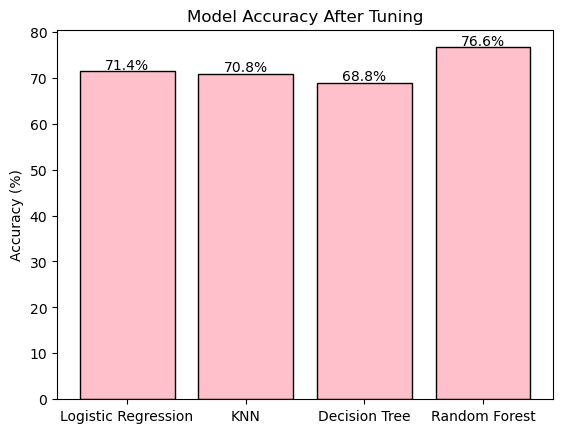

In [15]:
plt.bar(accuracy_after.keys(), [v*100 for v in accuracy_after.values()],color='pink',edgecolor='black')
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy After Tuning")
for i, v in enumerate(accuracy_after.values()):
    plt.text(i, v * 100 + 0.5, f"{v*100:.1f}%", ha="center")
plt.show()

## Prediction Function

In [16]:
def predict_diabetes(sex, pregnancies, glucose, bp, insulin, bmi, age):

    if sex == 1:  # Male
        pregnancies = 0

    input_df = pd.DataFrame([[
        pregnancies, glucose, bp, insulin, bmi, age, sex]], columns=X.columns)

    prediction = final_model.predict(input_df)[0]
    probability = final_model.predict_proba(input_df)[0][1]

    risk = int(probability * 100)

    result = "Diabetic" if prediction == 1 else "Non-Diabetic"
    return result, risk

In [17]:
#Male
result, risk = predict_diabetes(sex=1,pregnancies=0,glucose=60,bp=80,insulin=15,bmi=21.5,age=23)
print(f"Male Patient → Result: {result}, Diabetes Risk: {risk}%")

#Female
result, risk = predict_diabetes(sex=0,pregnancies=2,glucose=160,bp=124,insulin=43,bmi=36.0,age=39)
print(f"Female Patient → Result: {result}, Diabetes Risk: {risk}%")

Male Patient → Result: Non-Diabetic, Diabetes Risk: 4%
Female Patient → Result: Diabetic, Diabetes Risk: 52%
